<a href="https://colab.research.google.com/github/marissa-graham/multiagent_systems/blob/master/Fictitious_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notes

Fictitious play: 
* Opponent is assumed to be playing the mixed strategy given by the empirical distribution of the opponent's previous actions. 
* Play the best response to that strategy.

In [0]:
import seaborn
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def best_response(p):
    """
    Return the best response action for player in game
    according to strategy_profile
    
    player: int specifying row/column player, so payoffs are game[:,:,player]
    game: (num_actions x num_actions x 2) numpy array
    strategy_profile: a vector of length num_actions with the observed
                      counts of our opponent up to this point
    """
    #my_payoffs = game[:,:,player]
    #if player > 0:
    #    my_payoffs = my_payoffs.T
    #strategy_probs = strategy_profile / np.sum(strategy_profile)
    
    probs = p['opponent'] / np.sum(p['opponent'])
    expected = np.sum(p['payoffs'].T * probs, axis=1)
    return np.argmax(expected)

def agent(game, p_i, beliefs):
    p = {'opponent':beliefs, 'payoff':0, 'player':p_i, 'payoffs':game[:,:,p_i]}
    if p_i > 0:
        p['payoffs'] = p['payoffs'].T
    return p

def printgame(p1, p2):
    for p in (p1, p2):
        print('Player '+str(p['player'])+": probs",
              str(np.round(p['probs'],4))+", payoff", p['payoff'])
    print()


def run_game(game, num_rounds, p1_initial, p2_initial, action_names, title):
    
    p1 = agent(game, 0, p2_initial)
    p2 = agent(game, 1, p1_initial)

    p1_actions, p2_actions = [], []
    p1_payoffs, p2_payoffs = [], []

    for i in range(num_rounds):

        p1_action, p2_action = best_response(p1), best_response(p2)

        p1['opponent'][p2_action] += 1
        p2['opponent'][p1_action] += 1

        p2_actions.append(p1['opponent']/np.sum(p1['opponent']))
        p1_actions.append(p2['opponent']/np.sum(p2['opponent']))

        p1['payoff'] += p1['payoffs'][p1_action, p2_action]
        """
        if i > 0:
            if p1['payoff'] >= max(p1_payoffs):
                print("New max payoff for player 1:", p1['payoff'])
        """
        p1_payoffs.append(p1['payoff'])
        p2['payoff'] += p2['payoffs'][p1_action, p2_action]
        p2_payoffs.append(p2['payoff'])
                  
        if i % 10000 == 0:
            print("Round", i)

    num_actions = len(p1_initial)
    p1_actions = np.array(p1_actions)
    p2_actions = np.array(p2_actions)
    fig, axes = plt.subplots(1,num_actions+1, figsize=(5*(num_actions+1),5))
    
    for i in range(num_actions):
        axes[i].plot(p1_actions[:,i], label='Player 1')
        axes[i].plot(p2_actions[:,i], label='Player 2')
        axes[i].set_title("Share of "+action_names[i])
        axes[i].set_ylim(-0.05,1.05)
        axes[i].legend()
    
    axes[-1].plot(p1_payoffs, label='Player 1')
    axes[-1].plot(p2_payoffs, label='Player 2')
    axes[-1].legend()
    axes[-1].set_title('Payoffs for each player over time')
    plt.suptitle(title)
    plt.show()

Round 0


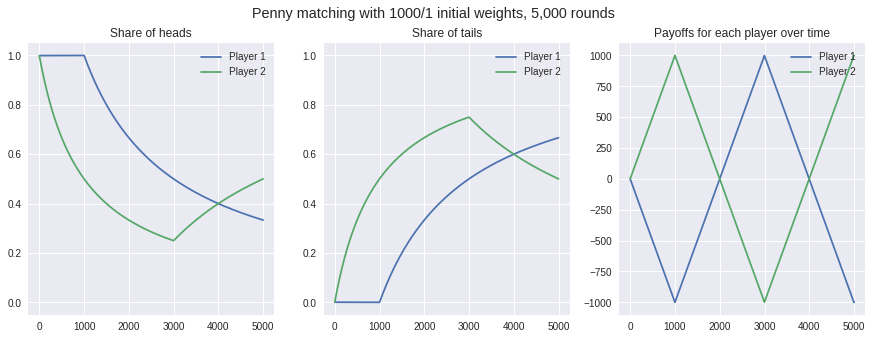

Round 0
Round 10000
Round 20000
Round 30000
Round 40000
Round 50000
Round 60000
Round 70000
Round 80000
Round 90000


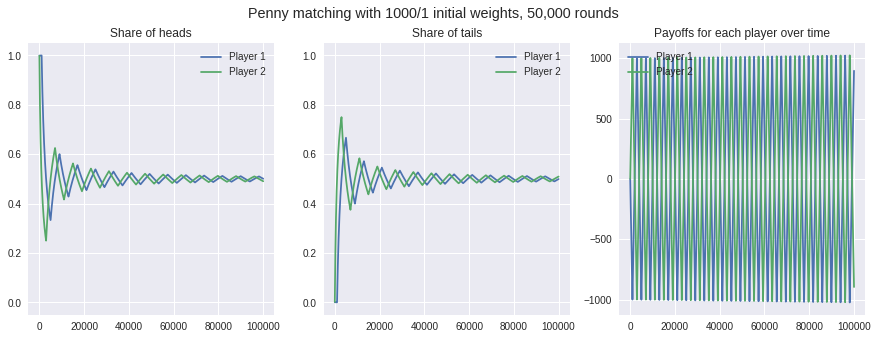

In [0]:
bs = np.array([[[2,1],[0,0]],
               [[0,0],[1,2]]])

coordination = np.array([[[2,2],[0,0]],
                         [[0,0],[1,1]]])

pennies = np.array([[[1,-1],[-1,1]],
                 [[-1,1],[1,-1]]])

shapley = np.array([[[0,0],[1,0],[0,1]],
                    [[0,1],[0,0],[1,0]],
                    [[1,0],[0,1],[0,0]]])
"""
# What solution occurs?
run_game(bs, 100, np.array([1,0]), np.array([0,1]),
         ['cooperation', 'defection'], 
         "Battle of the sexes with initial weights [1,0] and [0,1], 100 rounds")

# What solution occurs?
run_game(bs, 100, np.array([0,1]), np.array([1,0]),
         ['cooperation', 'defection'], 
         "Battle of the sexes with initial weights [0,1] and [1,0], 100 rounds")

# Phase trajectories for uniform initial weights 1? Solution chosen?
run_game(pennies, 100, np.ones(2), np.ones(2), ['heads', 'tails'],
        "Penny matching with uniform initial weights, 100 rounds")

run_game(pennies, 10000, np.ones(2), np.ones(2), ['heads', 'tails'],
        "Penny matching with uniform initial weights, 10,000 rounds")

#run_game(pennies, 1000000, np.ones(2), np.ones(2), ['heads', 'tails'],
#        "Penny matching with uniform initial weights, 1000000 rounds")
"""
# Phase trajectories for initial weights 1000/1? Solution chosen?

run_game(pennies, 5000, np.array([1000,1]), np.array([1000,1]), ['heads', 'tails'],
        "Penny matching with 1000/1 initial weights, 5,000 rounds")
run_game(pennies, 100000, np.array([1000,1]), np.array([1000,1]), ['heads', 'tails'],
        "Penny matching with 1000/1 initial weights, 50,000 rounds")

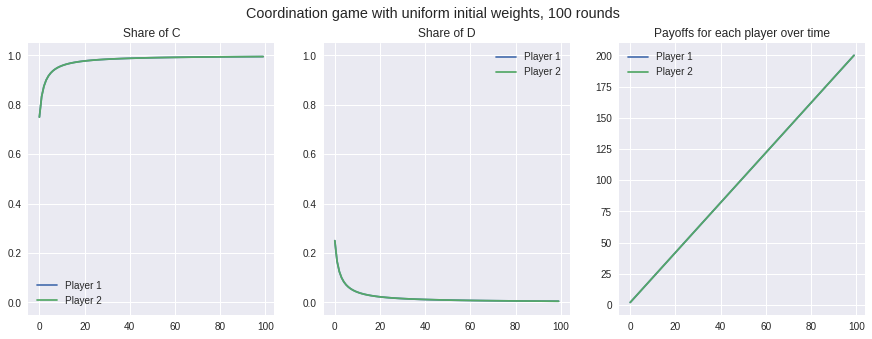

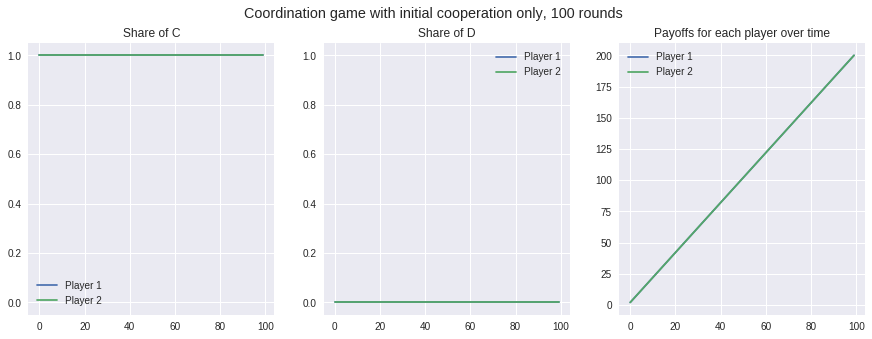

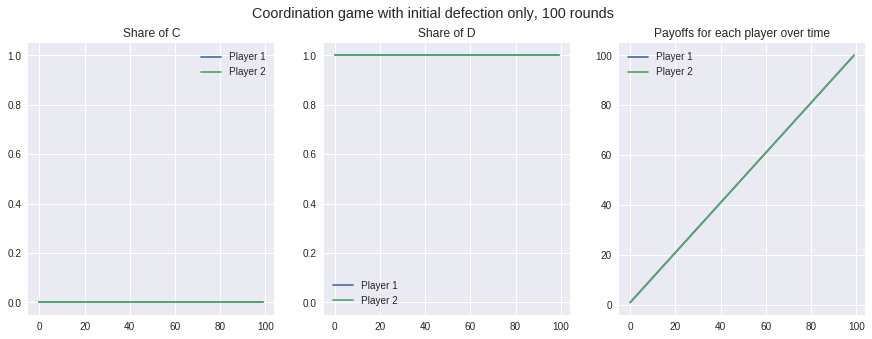

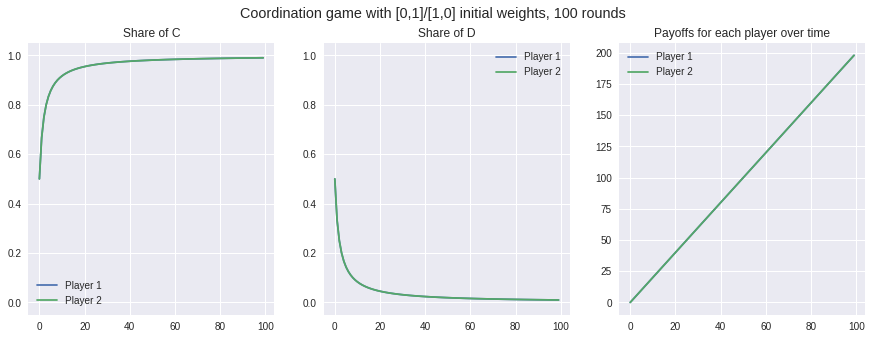

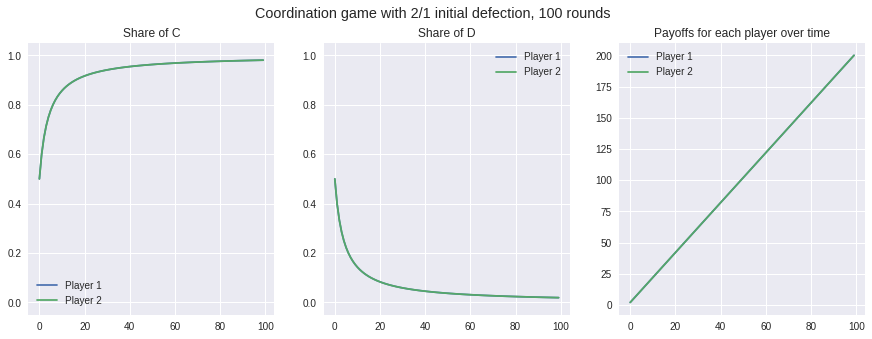

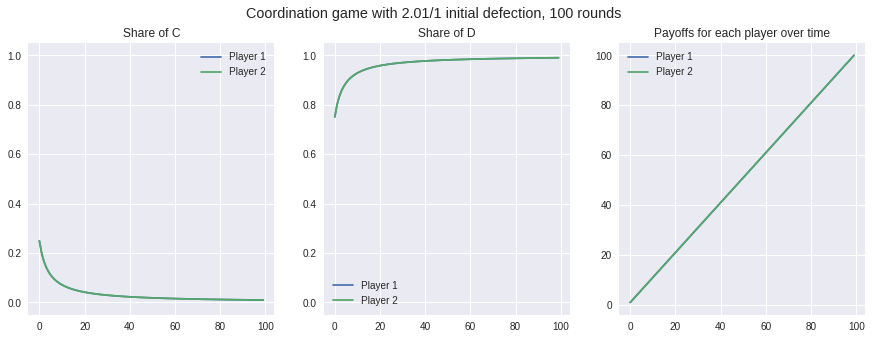

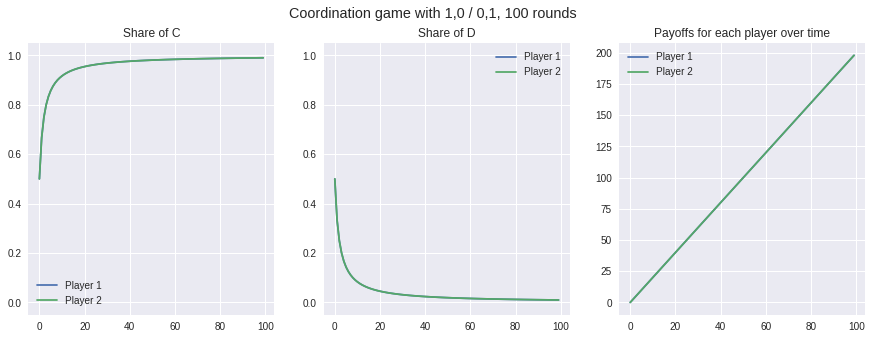

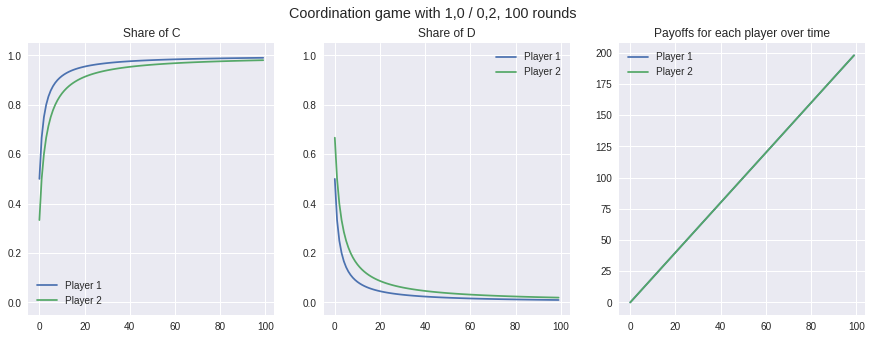

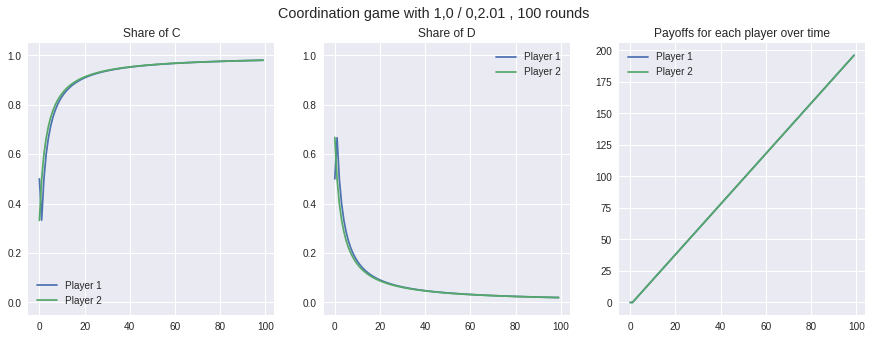

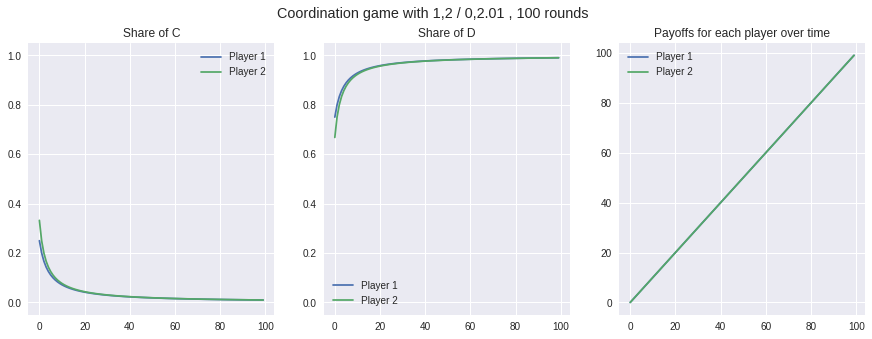

In [0]:
# What solution is chosen, and does this depend on initial weights?
run_game(coordination, 100, 0.5*np.ones(2), 0.5*np.ones(2), ['C','D'],
         "Coordination game with uniform initial weights, 100 rounds")
run_game(coordination, 100, np.array([1,0]), np.array([1,0]), ['C','D'],
         "Coordination game with initial cooperation only, 100 rounds")
run_game(coordination, 100, np.array([0,1]), np.array([0,1]), ['C','D'],
         "Coordination game with initial defection only, 100 rounds")
run_game(coordination, 100, np.array([0,1]), np.array([1,0]), ['C','D'],
         "Coordination game with [0,1]/[1,0] initial weights, 100 rounds")

run_game(coordination, 100, np.array([1,2]), np.array([1,2]), ['C','D'],
         "Coordination game with 2/1 initial defection, 100 rounds")
run_game(coordination, 100, np.array([1,2.01]), np.array([1,2.01]), ['C','D'],
         "Coordination game with 2.01/1 initial defection, 100 rounds")

run_game(coordination, 100, np.array([1,0]), np.array([0,1]), ['C','D'],
         "Coordination game with 1,0 / 0,1, 100 rounds")


run_game(coordination, 100, np.array([1,0]), np.array([0,2]), ['C','D'],
         "Coordination game with 1,0 / 0,2, 100 rounds")


run_game(coordination, 100, np.array([1,0]), np.array([0,2.01]), ['C','D'],
         "Coordination game with 1,0 / 0,2.01 , 100 rounds")

run_game(coordination, 100, np.array([1,2]), np.array([0,2.01]), ['C','D'],
         "Coordination game with 1,2 / 0,2.01 , 100 rounds")

Round 0


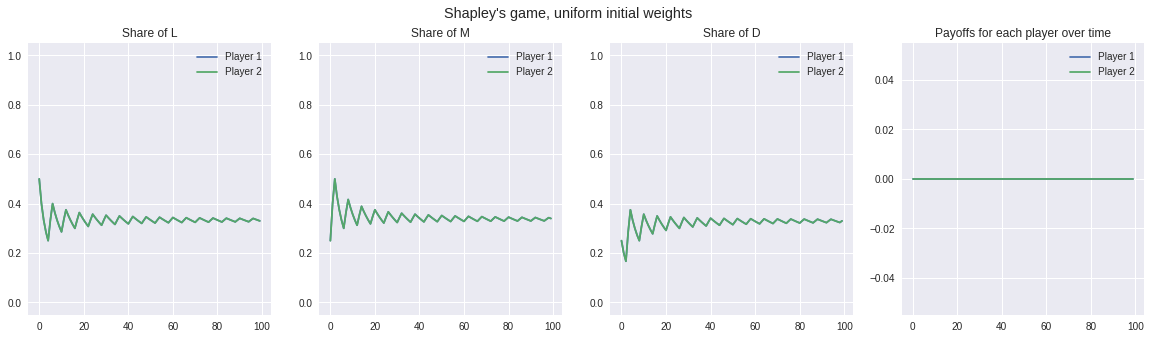

Round 0


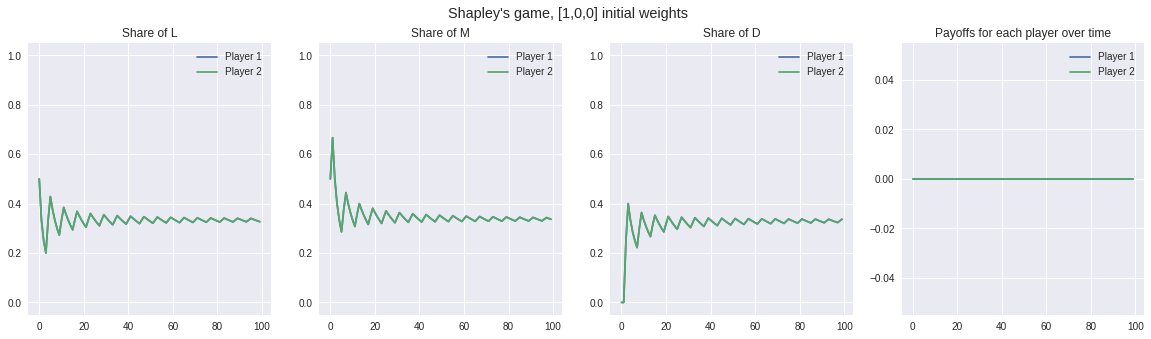

Round 0


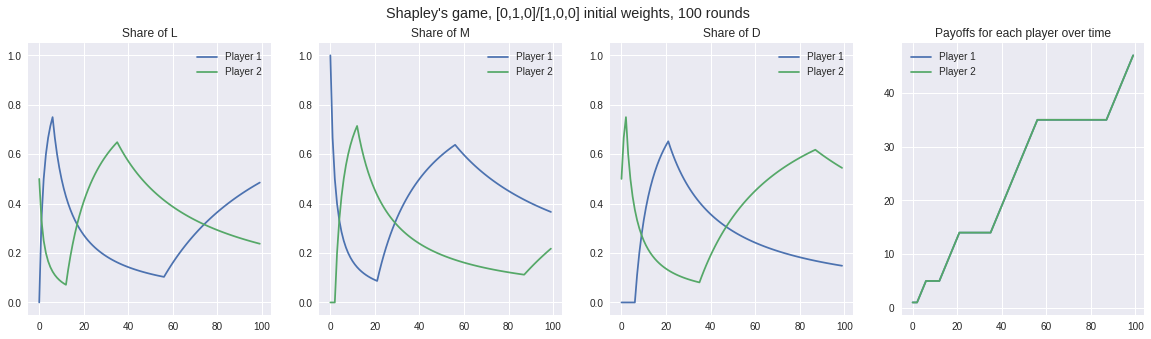

Round 0


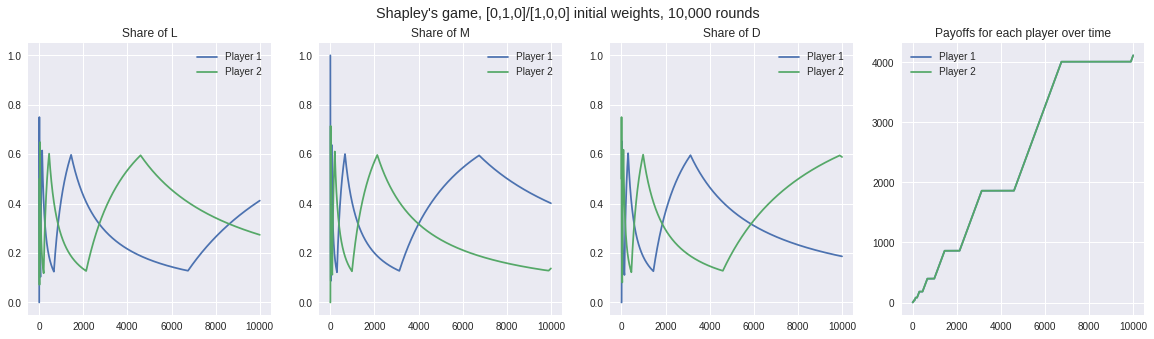

Round 0


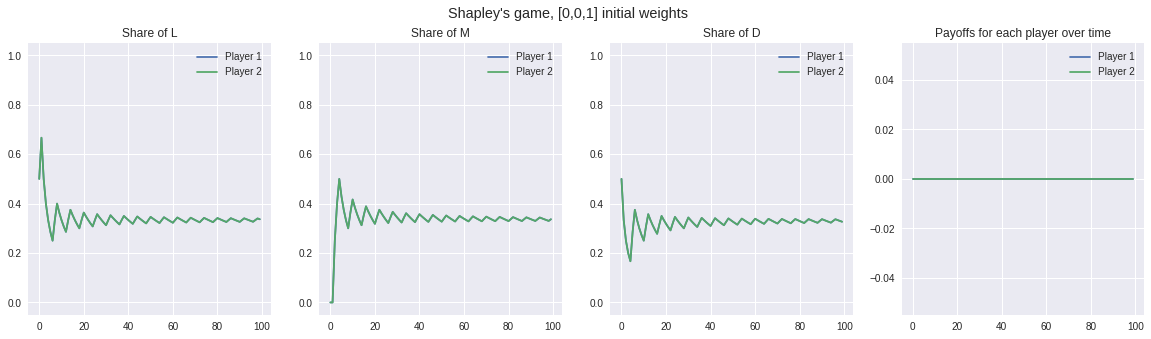

In [0]:
# Does this converge? What do the phase trajectories look like?
run_game(shapley, 100, np.ones(3), np.ones(3), ['L', 'M', 'D'],
         "Shapley's game, uniform initial weights")
run_game(shapley, 100, np.array([1,0,0]), np.array([1,0,0]), ['L', 'M', 'D'],
         "Shapley's game, [1,0,0] initial weights")

run_game(shapley, 100, np.array([0,1,0]), np.array([1,0,0]), ['L', 'M', 'D'],
         "Shapley's game, [0,1,0]/[1,0,0] initial weights, 100 rounds")
run_game(shapley, 10000, np.array([0,1,0]), np.array([1,0,0]), ['L', 'M', 'D'],
         "Shapley's game, [0,1,0]/[1,0,0] initial weights, 10,000 rounds")
run_game(shapley, 100, np.array([0,0,1]), np.array([0,0,1]), ['L', 'M', 'D'],
         "Shapley's game, [0,0,1] initial weights")

In [0]:
A = np.arange(9).reshape((3,3))
print(A)
print((A.T * np.array([0.25,0.25,0.5])).T)
print()
print((A * np.array([0.25,0.25,0.5])))
print()
print(np.sum(A.T * np.array([0.25,0.25,0.5]), axis=1)) # column sum
print()
print(np.sum(A * np.array([0.25,0.25,0.5]), axis=1)) # column sum

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0.   0.25 0.5 ]
 [0.75 1.   1.25]
 [3.   3.5  4.  ]]

[[0.   0.25 1.  ]
 [0.75 1.   2.5 ]
 [1.5  1.75 4.  ]]

[3.75 4.75 5.75]

[1.25 4.25 7.25]
